## Matrices Operations and Linear Regression

Suggestion: explore the NumPy library documentation to find the right functions to solve the exercises below

NumPy docs: https://numpy.org/doc/stable/

## Setup

In [26]:
import numpy as np  # This should be all the dependencies you will need


### 1.1 Matrix Element Wise-multiplication

Consider the two following matrices 

$$
A = \begin{pmatrix}
1&0&0\\
0&1&0\\
0&0&1\\
\end{pmatrix}
$$

and

$$
B = \begin{pmatrix}
1&2&3\\
4&5&6\\
7&8&9\\
\end{pmatrix}
$$

Write a Python program that computes the element-wise multiplication of the two matrices, i.e.

$$
C = \begin{pmatrix}
1&0&0\\
0&5&0\\
0&0&9\\
\end{pmatrix}
$$

In [27]:
## write your code here

a = np.array([1, 0, 0, 0, 1, 0, 0, 0, 1]).reshape(3, 3)
a

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [ ]:
a = np.array([1, 0, 0, 0, 1, 0, 0, 0, 1]).reshape(3, 3)
print(a)

a_alt = np.eye(3)
a_alt

b = np.arange(1, 10).reshape(3, 3)
print(b)

c = a*b
print(c)

c_example2= np.multiply(a,b)
c_example2

In [28]:
a_alt = np.eye(3)
a_alt

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [29]:
b = np.arange(1, 10).reshape(3, 3)
b

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [30]:
c = a*b
print(c)

c_example2= np.multiply(a,b)
c_example2

[[1 0 0]
 [0 5 0]
 [0 0 9]]


array([[1, 0, 0],
       [0, 5, 0],
       [0, 0, 9]])

In [ ]:
# dont use this - just for yourself
c = np.dot(a, b)
c

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [9]:
# dont use this as well - this is just another way to do matrix multiplication 
# but it doesnt work with eyes/identity
# use dot and so forth when your matrices arent of the same shape or size
c_tutalt = a @ b
c_tutalt

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

when you do np.dot or np.matmul it does matrix multiplication not element-wise multiplication. 

matrix multipliation follows lienar algebra rules fo rows x column but since a is an identity matrix it does nothing when multipled.

a*b or np.multiply(a,b) does element-wise multipliction which multiples each elemnt in the same posititon 

an identity matrix is a special square matrix that acts like 1 in normal multiplication - it has 1s on the main diagonal adn 0s everywhere else --> it is np.eye. It is needed for solving lienar equations, finding matrix inverses, computer graphis (transformations), machine learning

systems need a placeholder for “no change” so everything works uniformly - can turn transformations on/off 

### 1.2 Matrix-Matrix Multiplication

Consider the following two matrices

$$
A = \begin{pmatrix}
2&1&3\\
1&1&2\\
\end{pmatrix}
$$

and

$$
B = \begin{pmatrix}
1&2\\
5&6\\
7&9\\
\end{pmatrix}
$$

Write a Python program that computes the matrix multiplication of the two matrices, i.e.

$$
C = A \times B = \begin{pmatrix}
28&37\\
20&26\\
\end{pmatrix}
$$
Run the same program for the matrices of Exercise 1.1. Which result do you get?

In [31]:
## write your code here
q2_a = np.array([2,1,3,1,1,2]).reshape(2,3)
print(q2_a)
print("")
q2_b =np.array([1,2,5,6,7,9]).reshape(3,2)
print(q2_b)

print("")
q2_c = np.dot(q2_a,q2_b)
print(q2_c)

print("")
q2_c_part2= np.dot(a,b)
print(q2_c_part2)



[[2 1 3]
 [1 1 2]]

[[1 2]
 [5 6]
 [7 9]]

[[28 37]
 [20 26]]

[[1 2 3]
 [4 5 6]
 [7 8 9]]


### 1.3 Linear Regression

We generate some fake "height" and "weight" data about babies between 0 and 12 months of age.

We  want to create  linear predictor that predicts the weight from the baby age (in month).

In [32]:
# generate some fake "height" and "weight" data about babies between 0 and 12 months of age
babies = range(10)
months = np.arange(12)
data = [(month + np.random.rand(), np.dot(month, 24.7) + 96 + np.random.normal(loc=0, scale=20))
        for month in months
        for baby in babies]
month_data = [element[0] for element in data]
weight_data = [element[1] for element in data]
# Let's put the month_data into the matrix X together with the biases column vector
X_1 = np.array(month_data)    # here we put month_data into a row vector called X_1
X_0 = np.ones([X_1.shape[0], 1]) # this is the biases column vector
X_1 = X_1[:, np.newaxis]    # here we convert X_1 from a row vector to a column vector
X = np.concatenate((X_0, X_1), axis=1) # here we concatenate the biases vector to the month_data vector

# Let's put the weight_data into the output vector y
y = np.array(weight_data)

In [33]:
X.ndim, y.ndim

(2, 1)

In [34]:
X.shape, y.shape

((120, 2), (120,))

Our features matrix $X$ as a column of biases (all set to 1) and our column of input features (i.e age).

Our labels verctor $y$ is a row vector with our output labels (weights in some unspecified unit)

In [35]:
X

array([[ 1.        ,  0.23868451],
       [ 1.        ,  0.49903053],
       [ 1.        ,  0.0876527 ],
       [ 1.        ,  0.34156928],
       [ 1.        ,  0.7377368 ],
       [ 1.        ,  0.60974344],
       [ 1.        ,  0.95690382],
       [ 1.        ,  0.84363095],
       [ 1.        ,  0.77707411],
       [ 1.        ,  0.90661526],
       [ 1.        ,  1.51377845],
       [ 1.        ,  1.43075978],
       [ 1.        ,  1.81628715],
       [ 1.        ,  1.54828744],
       [ 1.        ,  1.80411262],
       [ 1.        ,  1.88668936],
       [ 1.        ,  1.05281905],
       [ 1.        ,  1.3506651 ],
       [ 1.        ,  1.58176202],
       [ 1.        ,  1.55332958],
       [ 1.        ,  2.21960575],
       [ 1.        ,  2.94519153],
       [ 1.        ,  2.97912244],
       [ 1.        ,  2.6562062 ],
       [ 1.        ,  2.46937548],
       [ 1.        ,  2.42001634],
       [ 1.        ,  2.3058265 ],
       [ 1.        ,  2.55875409],
       [ 1.        ,

In [36]:
y

array([114.37415037,  97.29639785,  76.70677199, 115.67743848,
        82.08221601, 109.18381213,  68.66580342,  85.59653704,
       136.35046905,  54.17576921, 116.59167286, 115.19018304,
       126.48309669, 122.46575323, 145.7892026 , 112.96278858,
       100.42998761, 137.29024484, 111.52905716, 103.01538595,
       157.23757024, 155.09740058, 156.89253618, 153.80858102,
       112.43871652, 133.80305431, 170.93723787, 163.61403082,
       122.51907822, 164.77702144, 173.80841614, 165.14681133,
       181.39899745, 173.98097365, 149.36946902, 149.99247974,
       161.97321548, 174.96924494, 161.47845807, 191.68712457,
       186.29603847, 193.47672268, 181.94929138, 184.14475254,
       201.54699241, 182.51791988, 187.08395052, 196.30144362,
       184.62285433, 194.14122903, 202.89479773, 193.85050065,
       221.11980244, 208.06526679, 217.75132607, 232.23961515,
       177.24194255, 198.07313881, 224.4632594 , 213.97296845,
       242.08100064, 248.51967761, 246.02081961, 248.38

Given: 
- the two-dimensional array (i.e. a matrix) $X$, containing a column with biases (all set to 1) and a column containing the ages of children (expressed in months)
- a one dimensional column array $y$ containing the weights of the same children expressed in kilograms
Write a function to compute the best fit  using the Linear Regression model with Ordinary Least Squares Method:
$$
\beta = (X^T X)^{-1}X^T y
$$
where, given a matrix $A$, $A^T$ is the transpose matrix of A, and $A^{-1}$ is the inverse matrix of $A$.


The $X$ and $y$ arrays have precomputed for you in the cell above

In [37]:
# Hint: check the NumPy documentation to find the functions to compute the transpose and the inverse of a matrix
def ols(X, y):
    XtranspX = np.dot(X.T,X)
    XinverseX = np.linalg.inv(XtranspX)
    XtranspY = np.dot(X.T,y)
    betaq3 = np.dot(XinverseX, XtranspY)
    return betaq3

In [ ]:
#toms response -> you can't do it in a diff order
def ols(X, y):
    '''returns parameters based on Ordinary Least Squares.'''
    Xt = X.T
    beta = np.linalg.inv(Xt @ X) @ Xt @ y
    return beta

Once you function has been written, you should be able to run the code below:

In [38]:
# find parameters
params = ols(X,y)
print('intercept: {} | slope: {}'.format(params[0], params[1]))

intercept: 81.33813052480002 | slope: 24.976207082423272


You should also be able to visualize the result of the OLS fitting running the code in the cell below:

Text(0, 0.5, 'Weight (?)')

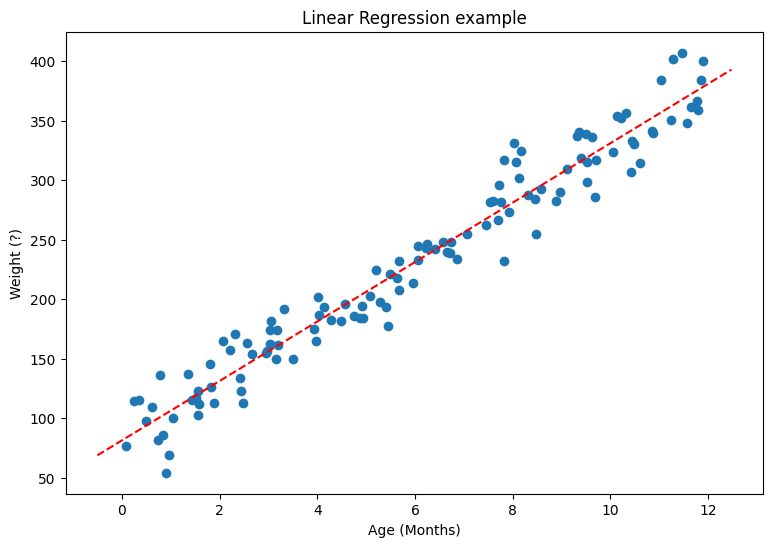

In [39]:
## here we draw a graph of the linear estimator
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 1, figsize=(9, 6))
axes.scatter(month_data, weight_data)
x_vals = np.array(axes.get_xlim())
y_vals = params[0] + params[1] * x_vals
axes.plot(x_vals, y_vals, 'r--')
plt.title('Linear Regression example')
plt.xlabel('Age (Months)')
plt.ylabel('Weight (?)')